# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [11]:
# Extract all rows of data
data = soup.find_all('tr', class_="data-row")

In [44]:
# Create an empty list
rows_list = []
# Loop through the scraped data to create a list of rows
for row in data:
    table_data = row.find_all('td')
    row = [col.text for col in table_data]
    rows_list.append(row)

In [45]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
list_data = pd.DataFrame(rows_list, columns= ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [46]:
# Confirm DataFrame was created successfully
list_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [47]:
# Examine data type of each column
list_data.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [48]:
# Change data types for data analysis
list_data.terrestrial_date = pd.to_datetime(list_data.terrestrial_date)
list_data.sol = list_data.sol.astype("int")
list_data.min_temp = list_data.min_temp.astype("float")
list_data.pressure = list_data.pressure.astype("float")
list_data.ls = list_data.ls.astype("int")
list_data.month = list_data.month.astype("int")

In [49]:
# Confirm type changes were successful by examining data types again
list_data.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [22]:
# 1. How many months are there on Mars?
list_data["month"].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [27]:
# 2. How many Martian days' worth of data are there?
list_data.sol.value_counts

<bound method IndexOpsMixin.value_counts of 0         10
1         11
2         12
3         13
4         14
        ... 
1862    1973
1863    1974
1864    1975
1865    1976
1866    1977
Name: sol, Length: 1867, dtype: int32>

In [29]:
# 3. What is the average low temperature by month?
avg_low_by_month = list_data.groupby("month")["min_temp"].mean()
avg_low_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

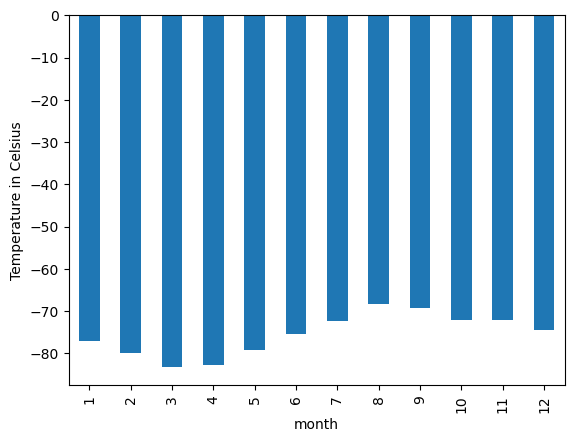

<Figure size 800x600 with 0 Axes>

In [32]:
# Plot the average temperature by month
avg_low_by_month.plot(kind='bar')
plt.ylabel('Temperature in Celsius')
plt.figure(figsize=(8, 6))
plt.show()

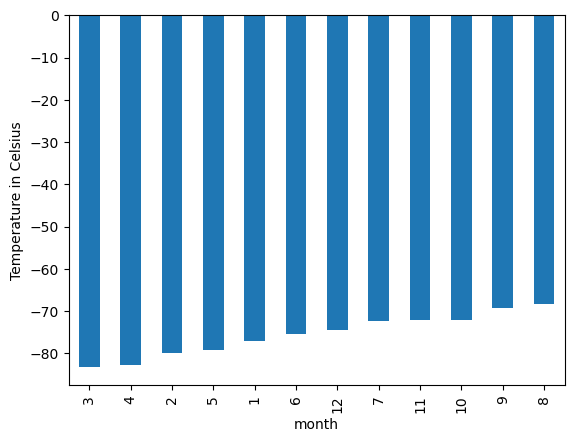

<Figure size 800x600 with 0 Axes>

In [33]:
# Identify the coldest and hottest months in Curiosity's (the rover) location by sorting plot
avg_low_by_month.sort_values().plot(kind='bar')
plt.ylabel('Temperature in Celsius')
plt.figure(figsize=(8, 6))
plt.show()

In [54]:
# 4. Average pressure by Martian month
avg_pressure_month = list_data.groupby("month")["pressure"].mean()
avg_pressure_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

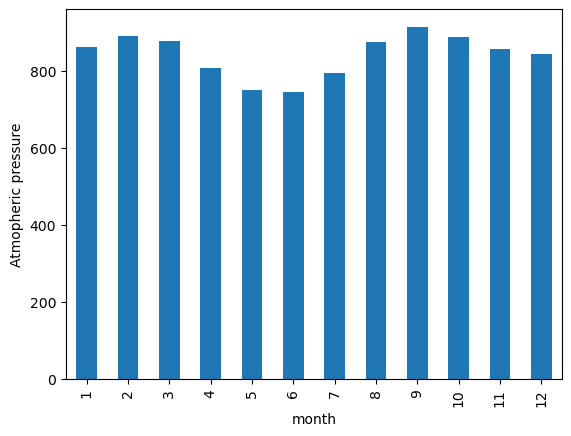

<Figure size 800x600 with 0 Axes>

In [55]:
# Plot the average pressure by month
avg_pressure_month.plot(kind='bar')
plt.ylabel('Atmopheric pressure')
plt.figure(figsize=(8, 6))
plt.show()

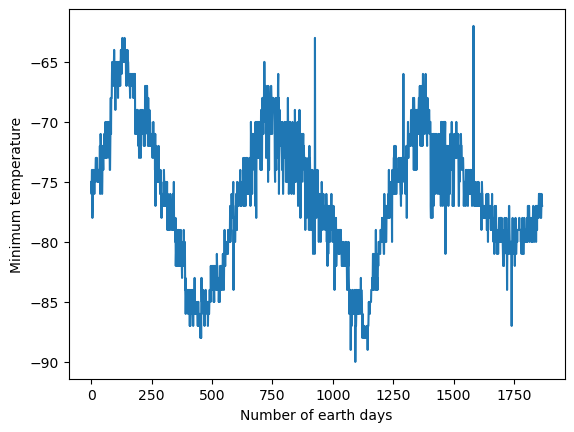

<Figure size 800x600 with 0 Axes>

In [56]:
# 5. How many terrestrial (earth) days are there in a Martian year?
list_data.min_temp.plot()
plt.xlabel('Number of earth days')
plt.ylabel('Minimum temperature')
plt.figure(figsize=(8, 6))
plt.show()

In [58]:
# Write the data to a CSV
list_data.to_csv('Part_2_output_data.csv')

In [59]:
browser.quit()